In [2]:
import matplotlib.pyplot as plt
import os
import pydicom
import numpy as np
import random

In [3]:
untampered_data_path = r"/mnt/c/Users/jones/OneDrive/Desktop/VS_Code/STA221/Data/untampered_slices"
tampered_data_path = r"/mnt/c/Users/jones/OneDrive/Desktop/VS_Code/STA221/Data/tampered_slices"

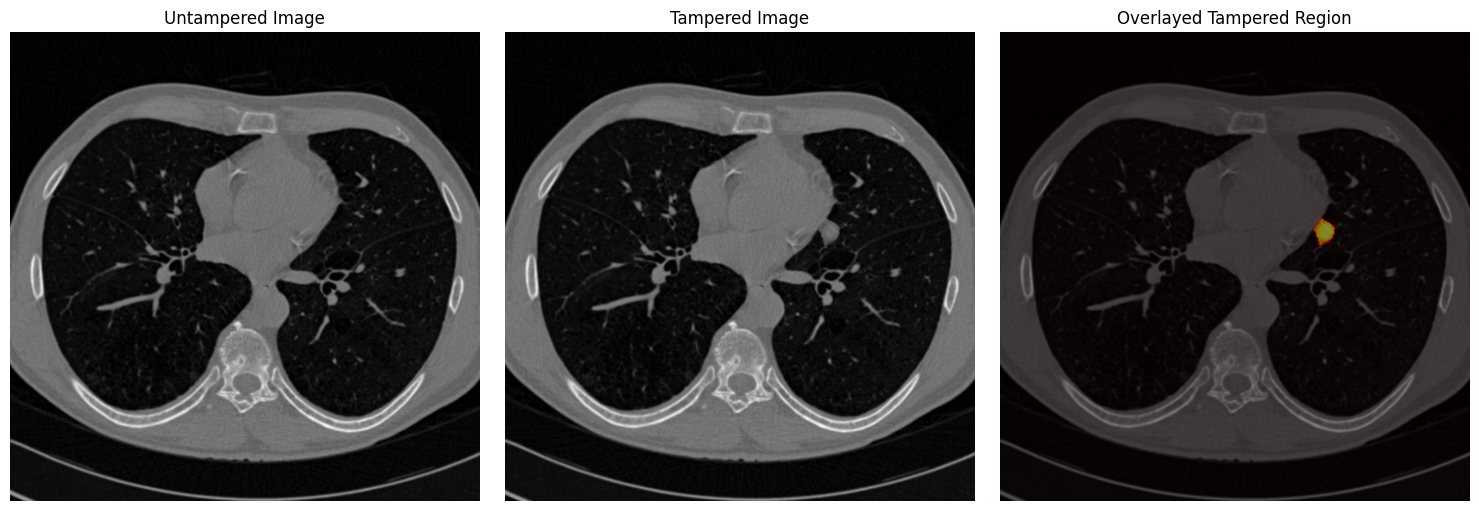

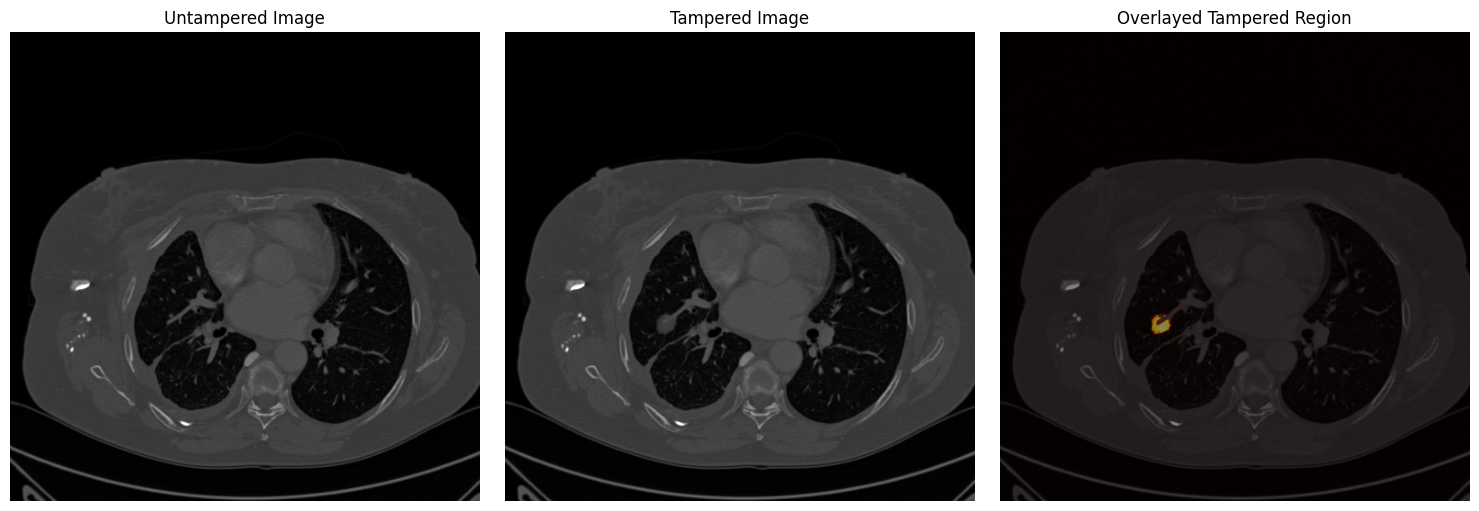

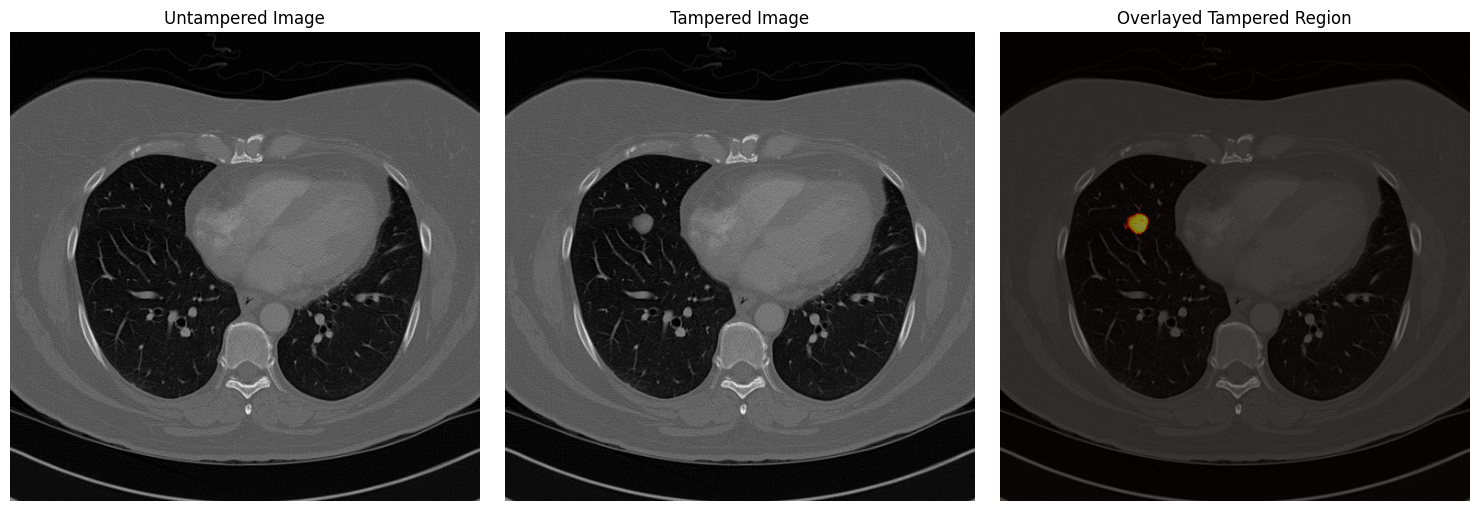

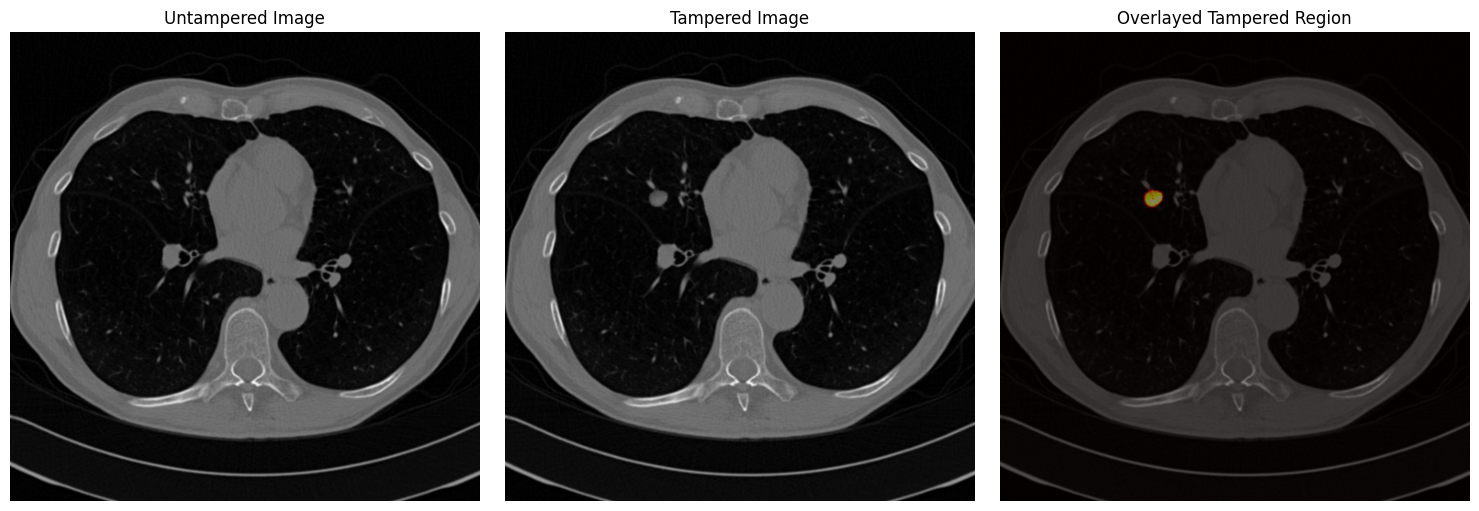

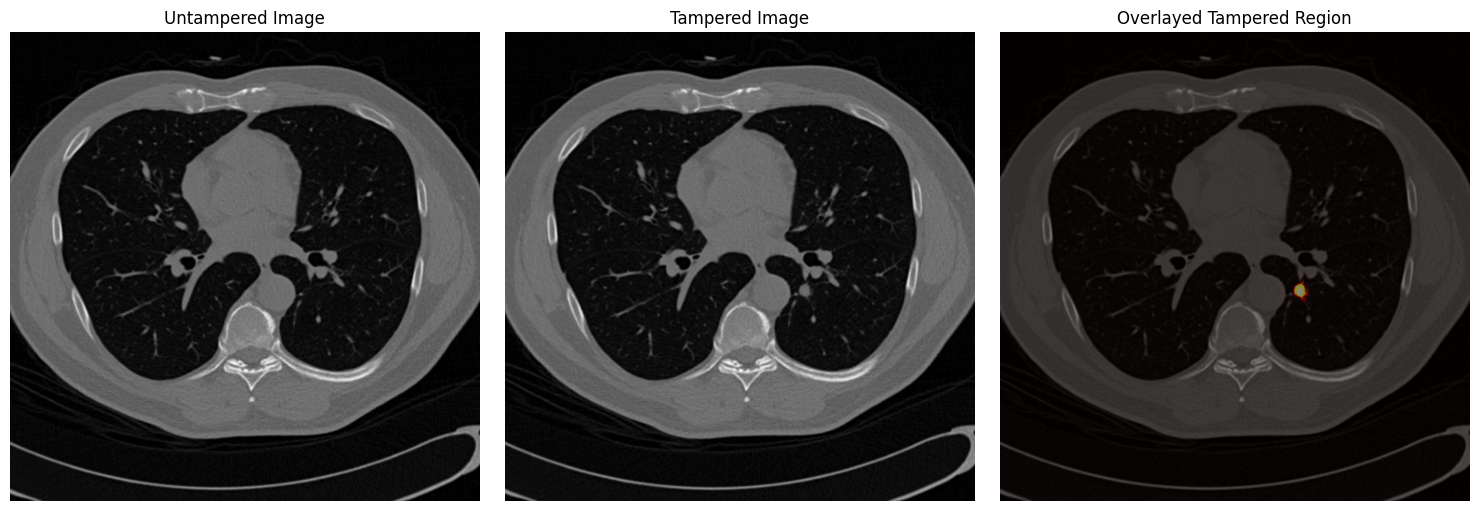

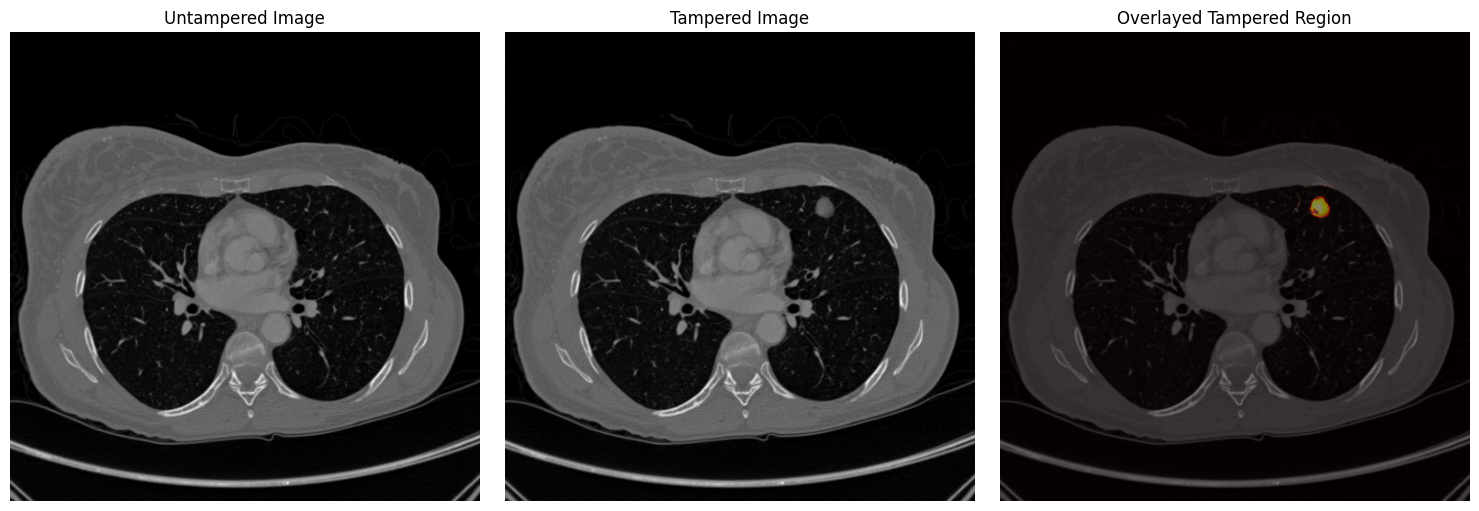

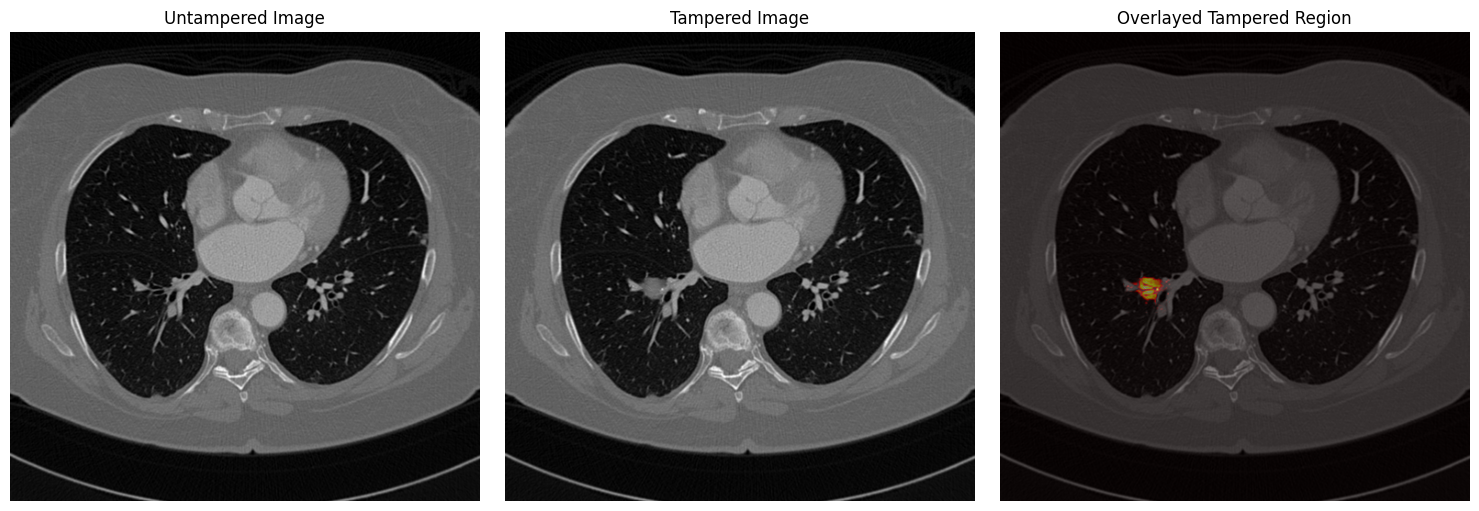

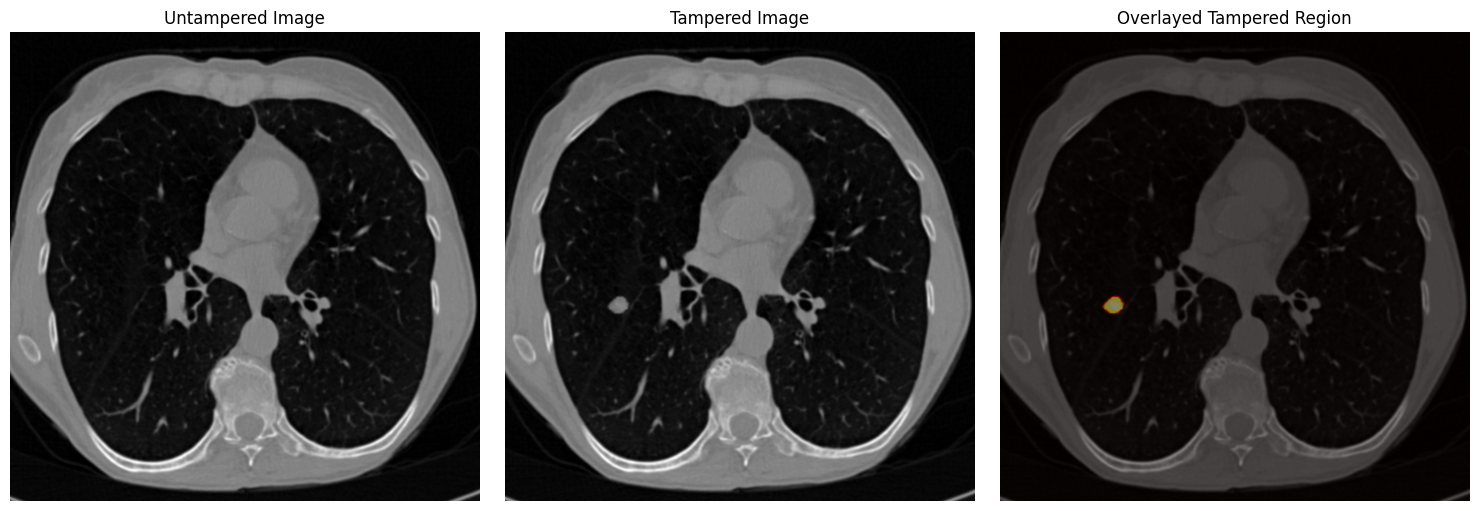

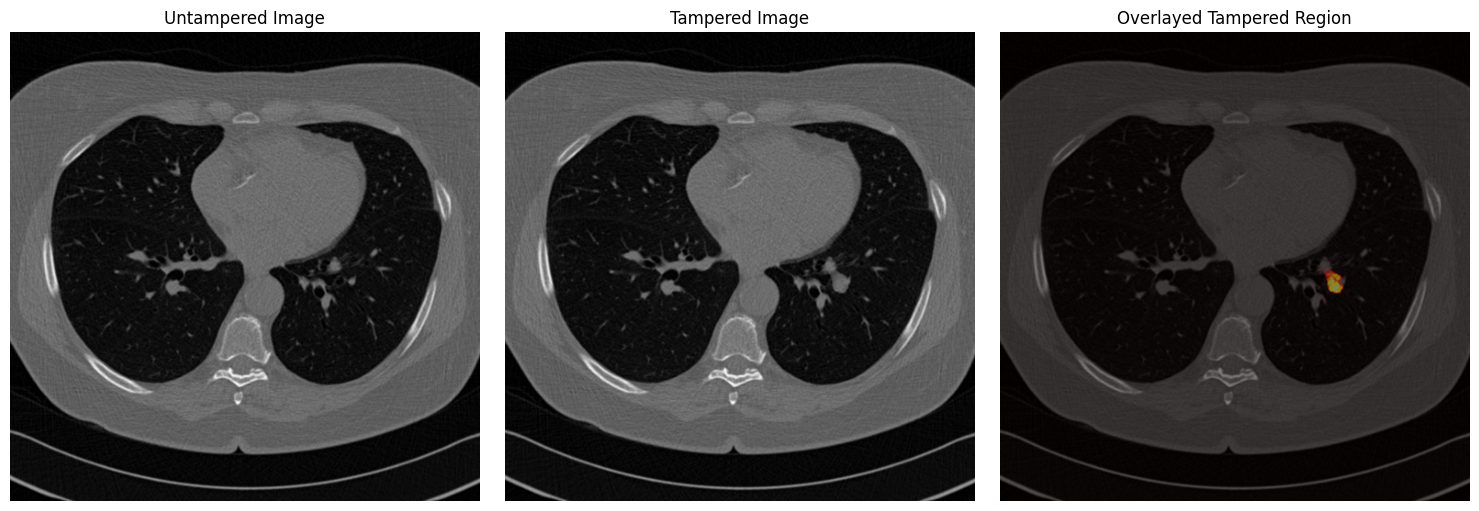

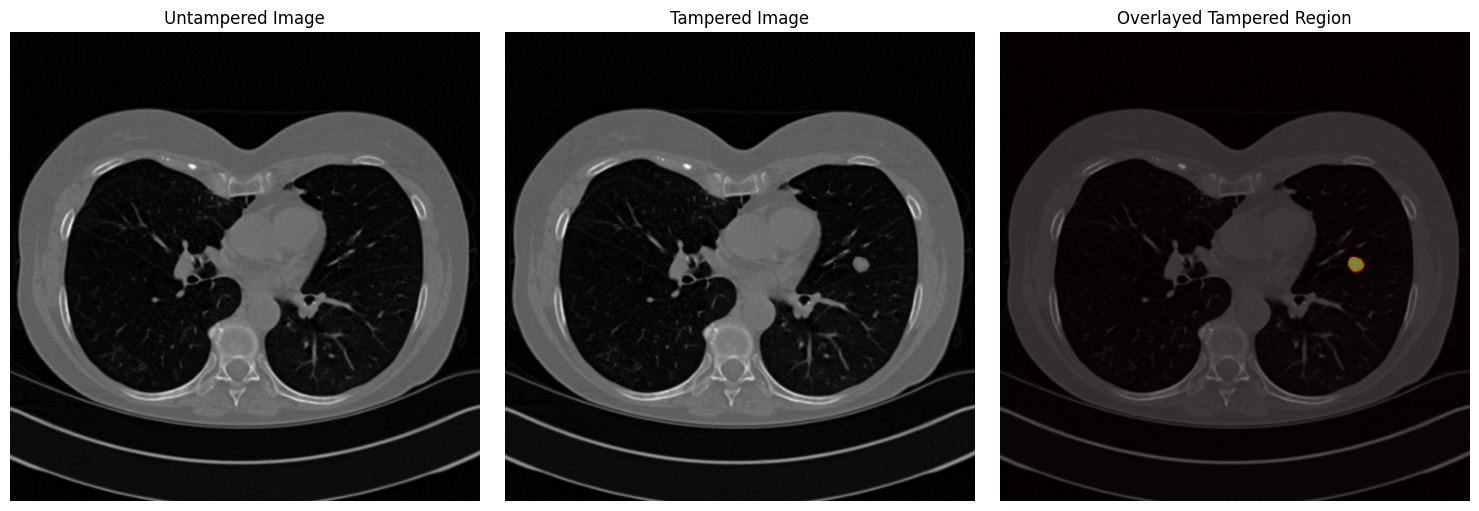

In [5]:
images_to_plot = 10

untampered_dcm_paths = os.listdir(untampered_data_path)

untampered_to_plot = random.sample(untampered_dcm_paths, images_to_plot)

for untampered_slice_path in untampered_to_plot:
    # Read untampered and tampered DICOM files
    dcm_untampered = pydicom.dcmread(os.path.join(untampered_data_path, untampered_slice_path))
    untampered_im = dcm_untampered.pixel_array

    tampered_slice_path = os.path.join(tampered_data_path, untampered_slice_path)
    dcm_tampered = pydicom.dcmread(tampered_slice_path)
    tampered_im = dcm_tampered.pixel_array

    # Calculate the absolute difference
    diff_im = np.abs(untampered_im - tampered_im)

    # Normalize the difference for better visualization (scale to 0-255)
    diff_normalized = (diff_im / np.max(diff_im) * 255).astype(np.uint8)

    # Create a single figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display the untampered image
    axes[0].imshow(untampered_im, cmap='gray')
    axes[0].set_title("Untampered Image")
    axes[0].axis('off')

    # Display the tampered image
    axes[1].imshow(tampered_im, cmap='gray')
    axes[1].set_title("Tampered Image")
    axes[1].axis('off')

    # Overlay the tampered region (difference)
    axes[2].imshow(untampered_im, cmap='gray')
    axes[2].imshow(diff_normalized, cmap='hot', alpha=0.5)  # Overlay with transparency
    axes[2].set_title("Overlayed Tampered Region")
    axes[2].axis('off')

    # Display the plots
    plt.tight_layout()
    plt.show()